In [1]:
import nltk
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

Carico i dati ed elimino i duplicati

In [2]:
comment = pd.read_csv("../file_dati/GBcomments.csv", error_bad_lines=False)
comment.drop_duplicates(subset=["video_id", "comment_text"], keep='last', inplace=True)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comment.shape

(384293, 4)

In [4]:
import matplotlib.pyplot as plt

(array([1439.,  977.,  800.,  565.,  436.,  377.,  325.,  298.,  243.,
         215.,  208.,  164.,  156.,  144.,  151.,  128.,   99.,  106.,
          86.,   89.,   77.,   83.,   63.,   91.,   53.,   66.,   78.,
          63.,   74.,   54.,   49.,   42.,   53.,   39.,   41.,   35.,
          38.,   32.,   34.,   30.,   21.,   34.,   29.,   30.,   32.,
          20.,   25.,   21.,   25.,   25.,   20.,   14.,   20.,   12.,
          20.,   26.,   16.,   18.,   14.,   15.,   22.,   12.,   18.,
          16.,   11.,    9.,   21.,   15.,   18.,   19.,   11.,   10.,
          15.,    7.,   11.,   12.,   13.,   10.,   15.,   13.,   13.,
          10.,    5.,    6.,   11.,    9.,    8.,    8.,   10.,    7.,
           5.,    6.,   11.,   19.]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59, 

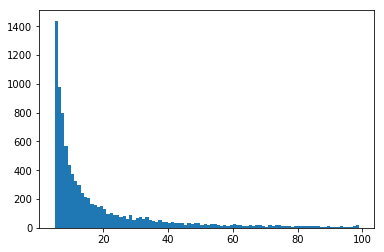

In [5]:
plt.hist(comment.likes[comment.likes!=0], range(5,100))

In [6]:
comment["label_like"] = np.where(comment["likes"] > 5 , "like", "no_like")

In [7]:
comment[comment["likes"] > 5].shape

(8198, 5)

In [8]:
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=8000),comment[comment.label_like=="no_like"].sample(n=8000)])

In [9]:
Mixcomment=Mixcomment.sample(frac=1)

In [10]:
Mixcomment=Mixcomment.sample(frac=1)
from sklearn.model_selection import train_test_split
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
model = Pipeline([
("vectorizer", TfidfVectorizer(min_df=2)),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [12]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

0.6289583333333333

In [13]:
comment_val[comment_val.label_like=="like"]

video_id                                       comment_text  likes  \
573677  d6a4AGg_TsI  How can you list 2 NY bbq places, and not list...     17   
95295   fIbiV-BpduM  Poco se habla de lo que ha robado el Barça, en...      8   
660932  y0NyGGFVZWA                      That's such an awesome story.     17   
106627  w8jscru2mDE  No one should support R kelly period stop fund...    115   
462312  3QzUSSKfEeA  I'm a rapper can you guys check my music out. ...      9   
280478  78hbYimcl9c  people in the comments section be so annoying,...      9   
169289  kk3ZcRtKt6Y                          he does have a right foot     16   
474079  7EtMqijwZhs  THE MAD WITCH OF THE TOY SWAMP CASTS A CURSE O...      8   
711293  4nm5gxYA9PE  yaaaay a gaming video on trending. never thoug...     10   
470644  hmhlamsHW04  Olga is my favorite teacher! Love that she is ...     49   
374248  X_PZvUM8P_U  If the showrunners cared as much about the plo...     14   
232330  6gwM9v_OwUc     PLEASE PLEASE TEENS REACT TO RUPAULS DRAG RACE     27   
617027  xUSJ4XK2UXg  Just what I needed on a Friday night! Does any...     16   
228186  l7yxJDFvTRM                              This is depressing...     29   
87999   VSulFZ7XJ1U  They forgot about when Bobby's mom tackled his...     16   
400563  xF7_tPoCihI  Love you alfie your such an inspiration to man...      7   
499264  1pCSv7uXcxE  the way you edited the aquariam part made me f...     10   
262944  72HS6nTgeOE  I´d wish that all english native speakers woul...     11   
492812  HuoOEry-Yc4                                   Sana is GORGEOUS      6   
255882  6gwM9v_OwUc                                       im catherine      7   
163289  N7DWig025Ig  Am I the only one wondering what the last pres...    916   
179334  1kHmFjHzR-s  Sam: So, who are your beauty icons?\nVic: Star...    113   
489661  W1N7M4kd_yU                    BEST COUPLE EVER 💓💓😍 who agrees      6   
715382  -AJyaVduxCc  Loni all in her damn phone I know she was thin...     21   
294982  PHpMh4E4KKQ  Love seeing her, please continue the updates.....     20   
398298  a2VRtAFqb4U  video says hidden features and guy starts show...     12   
439843  M6XiFKB7j0w               Did he just admit to being a virgin?      6   
463233  i4Q9WRsAZeM  I'm a simple guy, if i see a jacob video i lik...      8   
718033  T2RUYYs8Hxc         Right now I want an Eminem rap-metal album     82   
475210  NheUm_izr6A  My husband and I have been married over 17 yea...     50   
...             ...                                                ...    ...   
717700  AUP3uhrM19c                    Arsenalfantv and chill anyone??     42   
314426  gOHHQ9WunXs  Ben fenerliydim artık beşiktaşlıyım süper takı...     34   
357765  jj3zDdqbwTY                                   #StopCoolerAbuse      6   
164432  0Jjm3d_7N6A  I genuinely love watching you unedited , I fee...     60   
714174  JpCuIahlvR0      Suarez mandando a callar al atletico k payaso     18   
392427  xfQvngEXob4  Questionnaire: How would you describe Blade Ru...     23   
193089  aizefBpQCKo               He beat him like he stole something.     33   
387177  T58NGMrUp0M                   If it's free you're the product.     26   
69866   wP97gsUp4cM  1:05 cuando ves a la chica que te gusta demasi...     13   
140954  htSiIA2g7G8  Berry bark.\nWoof.\n\nI am DEAD, you guys are ...     49   
242309  nL9bZbv2aXY  Lex, do u think u can do a Halloween video I'm...      6   
500706  Hs2rDAuj7n8                   you are such a natural beauty xx      7   
562867  0lDRz8qmXpE  Moral of the story is,  girls are confusing bo...      7   
313008  nXZStT0kvVM                            Ozil my favorite player     36   
147077  -2hRYEFiPSA  Sometimes i feel a little bit angry with Chest...     15   
629567  sbS0COipGKE  I am sorry but I don't find homosexuality humo...     25   
234847  vLmEGZnDWog                             This makes me so happy    894   
210101  q1nvv1o1z3M  Big fucking open worl

In [14]:
comment_val[(model.predict(comment_val.comment_text.astype("U"))=="like") & (comment_val.label_like=="no_like")]

video_id                                       comment_text  likes  \
483299  A2cRZL70C0w  Aidy clearly described my reaction to this fuc...      0   
407876  NDGID7tOaK8                  I really in love with PUBG now :D      0   
517859  tTHMBjyzgEU                 I'm pooping while watching this...      0   
219663  tku0H7YeMeA  I didn't think it was possible to love this so...      0   
556338  6v3BWoddSgk       you are the best youtube couple ^^ i love ya      0   
44552   cOboLQMO4tQ  Knowi that Trump being a white supremacist is ...      0   
481659  jpvnPd0Y4MU  I like them but bmx better than  mountain bike...      0   
263595  _38JDGnr0vA                               Can't wait for this!      1   
324493  Y2GVVC_cD_E             They forced him to say NFL... ha. Lame      0   
497383  Uw3eeaFT5Rw                             This girl is a stunner      3   
155683  0eKdNcP4xrM                       I'm looking for the song lol      0   
356017  GO6qs83CHpc                                  Love Prince Harry      0   
618771  Wp2TUPo5W0c  Thanks for having the courage to be so open ab...      0   
434894  thD6TNUoyIk  That was really, really bloody difficult. It w...      0   
129652  a41k9oJN0FI  Heard this movie wasn't good. So much Mystits ...      0   
503385  bEk3_PfD0hA  This VIDEO is great! Honestly the best, maybe ...      0   
551726  odhMmAPDc54                                              Truth      0   
508727  ruTB5jBGXsE                   The first one is literally me 😂😂      0   
540696  0IkPBqbfzg4  i really loved this video! unlike some other h...      0   
584523  J_qs-CH715g        Cheryl will have some love this season?????      0   
426666  g85RGiOgUtI  Ehen you shoulda been spendin that money on ri...      0   
285471  vlzHNY2SWps  But if you don't argue then how in the heck wi...      0   
675684  iALfvFpcItE  I've been on an ssri (zoloft) for 5 years now,...      0   
402042  Flmxl3ZfjVM     only for me his eyes looks like goats eyes????      1   
79159   XpVt6Z1Gjjo                               I want to kiss him 😁      0   
593296  R1ZXOOLMJ8s  my mouth dropped as fast as those kid's voices...      0   
234943  vLmEGZnDWog                                 BACK TOGETHER YESS      0   
630985  p5iH-uKHmfo  Just here to let you know that I ordered the g...      3   
610083  KEJKtxib4yA  So Ian McCall basically is saying he pulled a ...      0   
171912  WIUx-Ym0I2A         It kinda looks like Wybie from Coraline :)      0   
...             ...                                                ...    ...   
46800   ykUupQoJsIY  And noped the hell back to my room is official...      0   
51870   xItyQC64KWQ  Nunes lost this fight 100% Valentina should be...      0   
542759  Y8kAZAQ5dX0  Awwwwwwwwwwwwwwwwwwwwww I don't have a Twitter...      0   
248809  ILDy6kYU-xQ              3:10 that's one horrific looking baby      0   
108505  VJ4yhjTkuNE  I love her she is really a motivation for ppl ...      0   
246091  qdWUQGHtyPk  I agree with Trump that what the NFL players d...      0   
245673  t2oVUxTV4WA  Lmao I feel like Jennifer Lawrence's response ...      0   
167195  SHq2qrFUlGY                    Me enamoré 😍 Nicky el mejor !!!      0   
299094  y9vsRUmPCKk  your skin is so gorge!! Your giving me my life...      0   
328651  dwWs7ZnGekc  Heard this a week after it came out and though...      0   
138963  sgBGvgxuXvQ  This looks absolutely divine!! Why can't there...      0   
293461  sxkP5m3RKQQ  Its the beginning of the end for saudi arabia ...      0   
662503  Lk7iJthBk6I  Can I just say it was freaking the hell out of...      0   
171593  xcJXT5lc1Bg                                     Rip Mr Stanton      3   
282705  bd7IGZ6dulM  AND NOW I JUST SSSSSIIIIIIIIIIIITTTTTTTTTTTTTT...      0   
368644  EZEi-87vLqE  I looooved the outfit! Especially the boots. S...      0   
173997  grmRVWlb1r0                                             My man      0   
162753  L6QAx5mqFKU  I ate like Kourtney K

In [15]:
model.predict_proba(["Me too"])

array([[0.32581109, 0.67418891]])

In [16]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

0.6393794576687314

In [17]:
comment["label_like"] = np.where(comment["likes"] > 1 , "like", "no_like")

In [18]:
comment["label_like"] = np.where(comment["likes"] > 1 , "like", "no_like")
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=60000),comment[comment.label_like=="no_like"].sample(n=60000)])
Mixcomment=Mixcomment.sample(frac=1)
from sklearn.model_selection import train_test_split
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)
model = Pipeline([
("vectorizer", TfidfVectorizer(min_df=2)),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

In [ ]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
comment[comment.likes>10].shape

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 10 , "like", "no_like")
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=5000),comment[comment.label_like=="no_like"].sample(n=5000)])
Mixcomment=Mixcomment.sample(frac=1)
from sklearn.model_selection import train_test_split
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)
model = Pipeline([
("vectorizer", TfidfVectorizer(min_df=2)),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

In [ ]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

In [ ]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 4 , "like", "no_like")
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
comment[comment.likes>50].shape

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 50 , "like", "no_like")
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=4000),comment[comment.label_like=="no_like"].sample(n=4000)])
Mixcomment=Mixcomment.sample(frac=1)
from sklearn.model_selection import train_test_split
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)
model = Pipeline([
("vectorizer", TfidfVectorizer(min_df=2)),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

In [ ]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

In [ ]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 5 , "like", "no_like")
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
comment[comment.likes>7].shape

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 7 , "like", "no_like")
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=17000),comment[comment.label_like=="no_like"].sample(n=17000)])
Mixcomment=Mixcomment.sample(frac=1)
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)
model = Pipeline([
("vectorizer", TfidfVectorizer(min_df=2)),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

In [ ]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

In [ ]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 2 , "like", "no_like")
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
comment[comment.likes>8].shape

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 8 , "like", "no_like")
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=16000),comment[comment.label_like=="no_like"].sample(n=16000)])
Mixcomment=Mixcomment.sample(frac=1)
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)
model = Pipeline([
("vectorizer", TfidfVectorizer(min_df=2)),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

In [ ]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

In [ ]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
model.score(comment.comment_text.astype("U"), comment.label_like)

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 2 , "like", "no_like")
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
comment[comment.likes>9].shape

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 9 , "like", "no_like")
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=15000, random_state=42),comment[comment.label_like=="no_like"].sample(n=15000, random_state=42)])
Mixcomment=Mixcomment.sample(frac=1)
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)
model = Pipeline([
("vectorizer", TfidfVectorizer(min_df=2)),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

In [ ]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

In [ ]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
model.score(comment.comment_text.astype("U"), comment.label_like)

In [ ]:
comment[comment.likes>10].shape

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 10 , "like", "no_like")
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=14000, random_state=42),comment[comment.label_like=="no_like"].sample(n=14000, random_state=42)])
Mixcomment=Mixcomment.sample(frac=1)
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)
model = Pipeline([
("vectorizer", TfidfVectorizer(min_df=2)),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

In [ ]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

In [ ]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
model.score(comment.comment_text.astype("U"), comment.label_like)

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 2 , "like", "no_like")
model.score(comment.comment_text.astype("U"), comment.label_like)

In [ ]:
comment[comment.likes>13].shape

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 13 , "like", "no_like")
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=4000, random_state=42),comment[comment.label_like=="no_like"].sample(n=4000, random_state=42)])
Mixcomment=Mixcomment.sample(frac=1)
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)
model = Pipeline([
("vectorizer", TfidfVectorizer(min_df=2)),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

In [ ]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

In [ ]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
model.score(comment.comment_text.astype("U"), comment.label_like)

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 2 , "like", "no_like")
model.score(comment.comment_text.astype("U"), comment.label_like)

In [ ]:
comment[comment.likes>19].shape

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 19 , "like", "no_like")
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=8000, random_state=42),comment[comment.label_like=="no_like"].sample(n=8000, random_state=42)])
Mixcomment=Mixcomment.sample(frac=1)
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)
model = Pipeline([
("vectorizer", TfidfVectorizer(min_df=2)),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

In [ ]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

In [ ]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
model.score(comment.comment_text.astype("U"), comment.label_like)

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 2 , "like", "no_like")
model.score(comment.comment_text.astype("U"), comment.label_like)

# Almeno 14 like

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 13 , "like", "no_like")
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=4000, random_state=42),comment[comment.label_like=="no_like"].sample(n=4000, random_state=42)])
Mixcomment=Mixcomment.sample(frac=1)
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)
model = Pipeline([
("vectorizer", TfidfVectorizer(ngram_range=(1,2))),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

In [ ]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

In [ ]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
model.score(comment.comment_text.astype("U"), comment.label_like)

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 2 , "like", "no_like")
model.score(comment.comment_text.astype("U"), comment.label_like)

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 14 , "like", "no_like")
Mixcomment=pd.concat([comment[comment.label_like=="like"].sample(n=11000, random_state=42),comment[comment.label_like=="no_like"].sample(n=11000, random_state=42)])
Mixcomment=Mixcomment.sample(frac=1)
comment_train, comment_val = train_test_split(Mixcomment, test_size=0.3, random_state=42)
model = Pipeline([
("vectorizer", TfidfVectorizer(min_df=2, ngram_range=(1,3))),
("classifier", LogisticRegression(C=10))
])
model.fit(comment_train.comment_text.astype("U"), comment_train.label_like)

In [ ]:
model.score(comment_val.comment_text.astype("U"), comment_val.label_like)

In [ ]:
model.score(comment.comment_text.astype("U")[~comment.index.isin(comment_train.index)], comment.label_like[~comment.index.isin(comment_train.index)])

In [ ]:
model.score(comment.comment_text.astype("U"), comment.label_like)

In [ ]:
comment["label_like"] = np.where(comment["likes"] > 2 , "like", "no_like")
model.score(comment.comment_text.astype("U"), comment.label_like)

In [ ]:
coefs = pd.Series(model.named_steps["classifier"].coef_[0], index=model.named_steps["vectorizer"].get_feature_names())
coefs.sort_values(inplace=True)
coefs.head(40)

In [ ]:
coefs.tail()

In [ ]:
def showResults(model, sentence):
    value = model.predict_proba([sentence])[0] * 100
    return "Probabilità di ricevere molti like => {:.4f}".format(value[0])

In [ ]:
showResults(model, "This song brings so many emotions")

In [ ]:
showResults(model, "This song is better than the first opening, but the first opening will always be iconic to the series.")

In [ ]:
showResults(model, "I feel so patriotic when I hear this.")

In [ ]:
showResults(model, "Anyone here in the Dollars?")

In [ ]:
showResults(model, "Wowwww. Man i expected Kanazaki Elsa's songs to be some cringey ass pop... Guess tall loli has a good taste.")

In [ ]:
showResults(model, "omfg  i waited for this thank you so much <3")

In [ ]:
showResults(model, "Just an English comment passing through...")

In [ ]:
showResults(model, "I like how Pewnews series was created accidentally lol")

In [ ]:
showResults(model, "Woah. Both have roast videos and same views. Damn.")

In [ ]:
showResults(model, "I LOVE dogs I can’t stand the dogs whining in pain it sounds like nails on a chalkboard but worse")

In [ ]:
showResults(model, "I would like to work for Google one day.")

In [ ]:
showResults(model,"well and link in description goes to 404...")

In [ ]:
showResults(model, "Hello People Scrolling Through The Comments Section, If You Are Reading This, Have An Amazing Day!")

In [ ]:
showResults(model, "Why are they saying, gone wrong“ the vid was hilarious")

In [ ]:
showResults(model, "He protec He attac But most importanly He got the strap")

In [ ]:
showResults(model, "This is not a song, more like a message")

In [ ]:
comment[comment.comment_text=="The song is lit 🔥🔥🔥🔥"]